### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
#tf.set_random_seed(42)

In [3]:
tf.__version__

'2.0.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

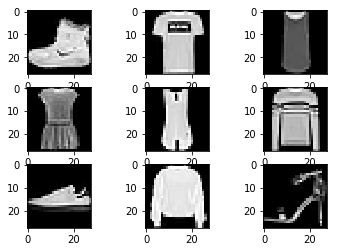

In [9]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(trainX[i],cmap =pyplot.get_cmap('gray'))

pyplot.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Normalize input data
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [0]:
# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 353.9825 - accuracy: 0.1067 - val_loss: 5888.5537 - val_accuracy: 0.1729
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: 5867.3394 - accuracy: 0.1758 - val_loss: 13522.2109 - val_accuracy: 0.3181
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 13448.1660 - accuracy: 0.3200 - val_loss: 18944.9180 - val_accuracy: 0.1304
Epoch 4/10
60000/60000 [==============================] - 0s 6us/sample - loss: 18890.8496 - accuracy: 0.1331 - val_loss: 18502.0762 - val_accuracy: 0.2754
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 18457.5996 - accuracy: 0.2731 - val_loss: 18183.0781 - val_accuracy: 0.2819
Epoch 6/10
60000/60000 [==============================] - 0s 6us/sample - loss: 18092.9062 - accuracy: 0.2867 - val_loss: 14624.8252 - val_accuracy: 0.2714
Epoch 7/10
60000/

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:

# Normalize the data
model.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [15]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10,
          batch_size = trainX.shape[0])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/sample - loss: 2.5466 - accuracy: 0.1309 - val_loss: 2.3487 - val_accuracy: 0.0542
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: 2.5426 - accuracy: 0.1310 - val_loss: 2.3478 - val_accuracy: 0.0542
Epoch 3/10
60000/60000 [==============================] - 0s 7us/sample - loss: 2.5390 - accuracy: 0.1310 - val_loss: 2.3468 - val_accuracy: 0.0542
Epoch 4/10
60000/60000 [==============================] - 0s 7us/sample - loss: 2.5353 - accuracy: 0.1311 - val_loss: 2.3459 - val_accuracy: 0.0542
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: 2.5316 - accuracy: 0.1311 - val_loss: 2.3449 - val_accuracy: 0.0542
Epoch 6/10
60000/60000 [==============================] - 0s 6us/sample - loss: 2.5279 - accuracy: 0.1311 - val_loss: 2.3439 - val_accuracy: 0.0542
Epoch 7/10
60000/60000 [==============================] - 0s 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
opt=tf.keras.optimizers.SGD(lr=0.001)
model_opt=tf.keras.models.Sequential()

# Normalize input data
model_opt.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense layer for prediction - Keras declares weights and bias automatically
model_opt.add(tf.keras.layers.Dense(10,activation='softmax'))
# Comile the model
model_opt.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model_opt.fit(trainX, trainY, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 4s 68us/sample - loss: 206.8360 - accuracy: 0.7385 - val_loss: 125.0776 - val_accuracy: 0.7834


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
optsgd=tf.keras.optimizers.SGD(lr=0.001)
model_opt_3=tf.keras.models.Sequential()

model_opt_3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
# Normalize the data
model_opt_3.add(tf.keras.layers.BatchNormalization())
# Add Dense layer for prediction - Keras declares weights and bias automatically
model_opt_3.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model_opt_3.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model_opt_3.add(tf.keras.layers.Dense(10,activation='softmax'))
# Comile the model
model_opt_3.compile(optimizer=optsgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [25]:
model_opt_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [26]:
model_opt_3.fit(trainX, trainY, validation_data=(testX, testY))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 7s 124us/sample - loss: 2.2205 - accuracy: 0.2659 - val_loss: 2.1072 - val_accuracy: 0.4341
